In [70]:
# import library
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgbm

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline

In [8]:
# load dataset
boston = load_boston()

# dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([data, target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
df.describe()
# CRIM = 범죄율 / ZN = 25,000 평방피트 초과 거주지역 비율
# INDUS = 비소매상업지역 면적 비율 / CHAS = 찰스강의 경계 위치 여부(위치=1,아니면=0)
# NOX = 일산화질소 농도 / RM = 주택당 방 수 / AGE = 1940년 이전에 건축된 주택의 비율
# DIS = 직업센터의 거리 / RAD = 방사형 고속도로까지의 거리 / TAX = 재산세율
# PTRATIO = 학생,교사 비율 / B = 인구 중 흑인 비율 / LSTAT = 인구 중 하위 계층 비율
# MEDV = 1978년 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값(단위:1,000달러)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


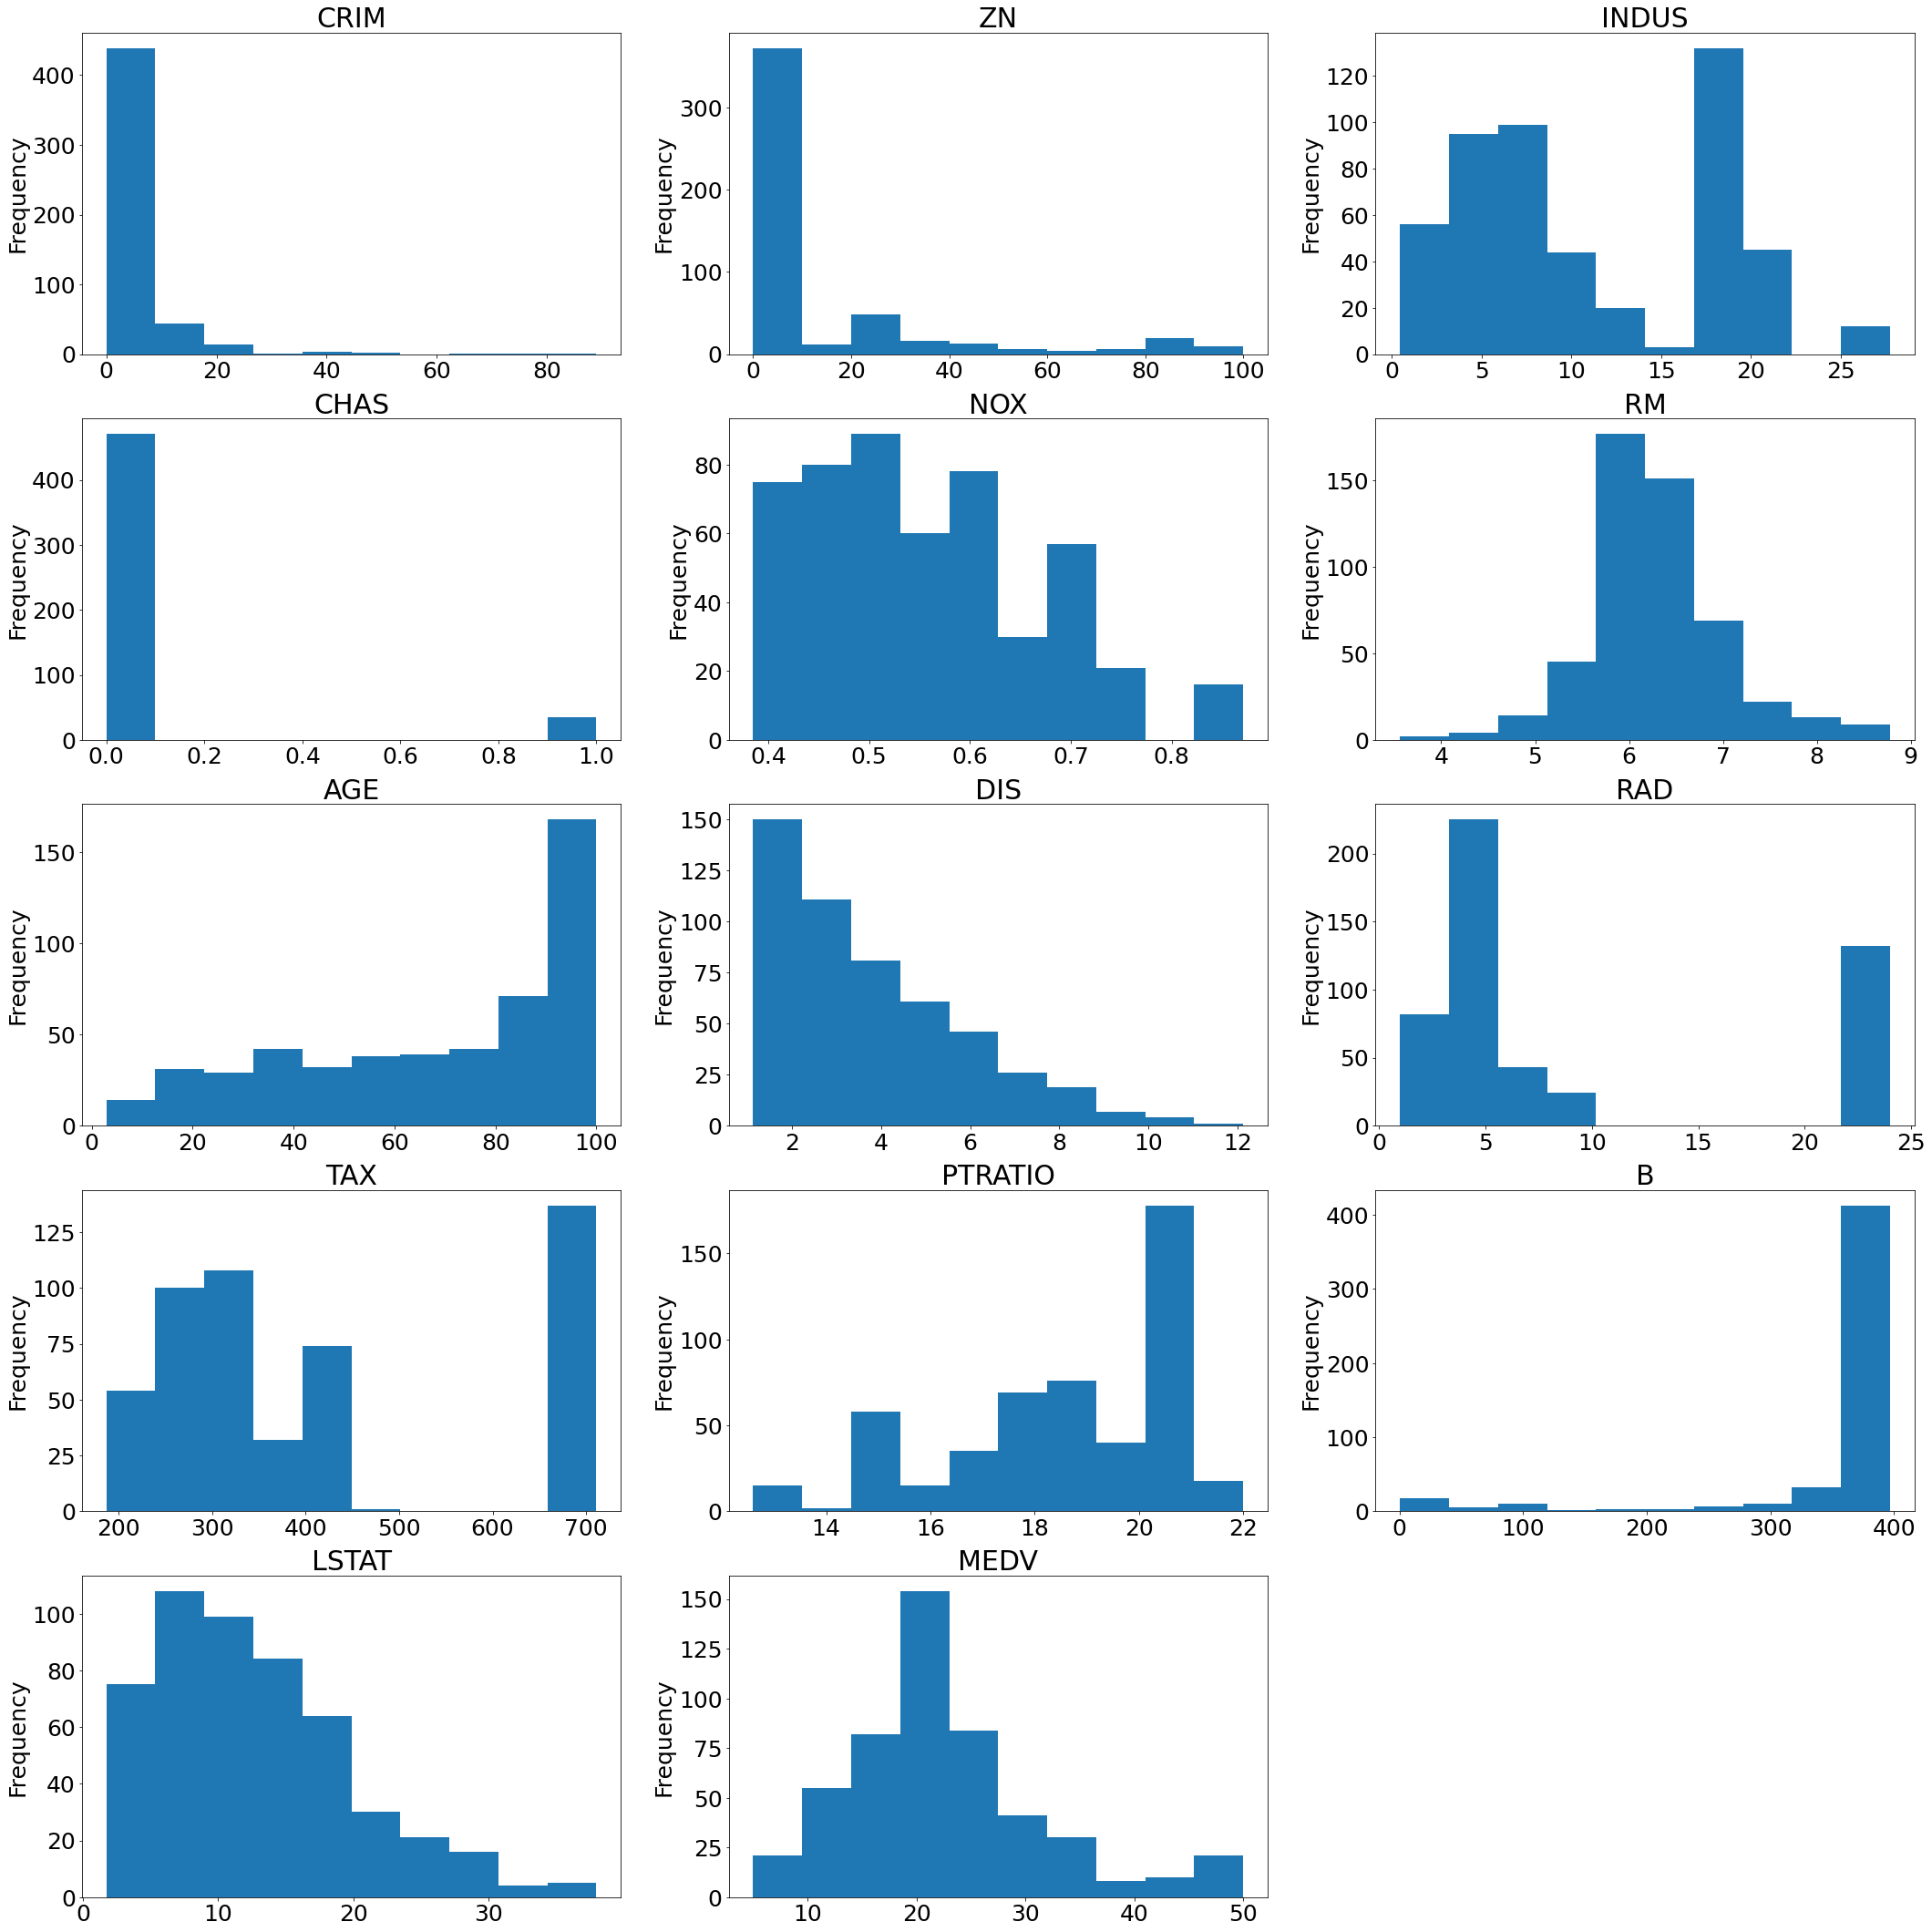

In [46]:
# 데이터 분포
plt.figure(figsize=(30,30))
for i in range(len(df.columns)):
    plt.subplot(5,3,i+1)
    df[df.columns[i]].plot.hist()
    plt.title(f'{df.columns[i]}')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.rc('font', size=25)

In [ ]:
# CHAS -> binary data(이진 데이터)
# CHAS를 제외한 나머지 데이터 -> continuous data(연속형 데이터)

In [53]:
# data preprocess
def prepro(data, method):
    if method == 'minmax':
        scaler = MinMaxScaler()
        data = data[:, np.newaxis]
        scaler.fit(data)
        return scaler.transform(data)
    
    if method == 'stand':
        scaler = StandardScaler()
        data = data[:, np.newaxis]
        scaler.fit(data)
        return scaler.transform(data)
    
    if method == 'robust':
        scaler = RobustScaler()
        data = data[:, np.newaxis]
        scaler.fit(data)
        return scaler.transform(data)

In [54]:
df['CRIM'] = prepro(df['CRIM'].values, 'stand')
df['ZN'] = prepro(dfp['ZN'].values, 'stand')

0     -0.419782
1     -0.417339
2     -0.417342
3     -0.416750
4     -0.412482
         ...   
501   -0.413229
502   -0.415249
503   -0.413447
504   -0.407764
505   -0.415000
Name: CRIM, Length: 506, dtype: float64

In [61]:
x = boston.data
y = boston.target

In [63]:
# PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

n = np.argmax(cumsum >= 0.95) + 1
print(n)

[0.80582318 0.96887514 0.99022375 0.99718074 0.99848069 0.99920791
 0.99962696 0.9998755  0.99996089 0.9999917  0.99999835 0.99999992
 1.        ]
2


In [ ]:
# Decision Tree
tree = DecisionTreeRegressor(criterion='mse', max_depth=10,
                             random_state=seed, min_samples_leaf=1,
                             min_samples_split=2, splitter='best')

tree_fit = tree.fit(x_train, y_train)

print(tree.feature_importances_)
Importance = pd.DataFrame({'Importance':tree.feature_importances_*100})
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature importance')

In [ ]:
# RandomForest
rf = RandomForestRegressor()

rf_fit = rf.fit(x_train, y_train)

print(rf.feature_importances_)
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100})
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature importance')

In [ ]:
# AdaBoost
adabst = AdaBoostRegressor()

adabst_fit = adabst.fit(x_train, y_train)

print(adabst.feature_importances_)
Importance = pd.DataFrame({'Importance':adabst.feature_importances_*100})
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature importance')

In [ ]:
# xgboost


In [ ]:
# lightGBM


In [ ]:
model_input = Input(shape=x_train.shape)

def DNN(model_input):
    x = Dense(100, activation='selu')(model_input)
    x = Dropout(0.2)(x)
    x = Dense(50, activation='selu')(x)
    x = Dropout(0.2)(x)
    x = Dense(10, activation='selu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs=model_input, outputs=outputs)
    return model

In [71]:
def hyperparameters():
    dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
    batches = [32, 64, 128]
    optimizers = ['adam', 'adadelta', 'rmsprop']
    return {'drop':dropout, 'batch_size':batches, 'optimizer':optimizers}

In [ ]:
hyperparameters = hyperparameters()
model = KerasRegressor(build_fn = DNN, verbose=1)
search = GridSearchCV(model, hyperparameters, cv=5)

In [ ]:
best_model = search.fit(x_train, y_train, epochs=10)

In [ ]:
print(search.best_params_)

In [ ]:
pred = best_model.predict(x_test)